In [1]:
# Import Library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Music Recommendation
In this second example, we are going to build a very simple music recommender system based on the previous music genre that a particular customer pick

### Step 01 : create the data

In [2]:
# Membuat dataset
df = pd.DataFrame({'title'   : [('Song_'+ str(i)) for i in range(1, 11)],
                   'genre'   : ['pop', 'jazz', 'dangdut', 'pop', 'jazz', 'dangdut', 
                          'pop', 'jazz', 'dangdut', 'pop'],
                   'penyanyi' : ['Andi', 'Andi', 'Andi','Budi', 'Budi', 'Budi', 
                          'Caca', 'Caca', 'Caca', 'Caca']})

df

,title,genre,penyanyi
0,Song_1,pop,Andi
1,Song_2,jazz,Andi
2,Song_3,dangdut,Andi
3,Song_4,pop,Budi
4,Song_5,jazz,Budi
5,Song_6,dangdut,Budi
6,Song_7,pop,Caca
7,Song_8,jazz,Caca
8,Song_9,dangdut,Caca
9,Song_10,pop,Caca


In [3]:
# Membuat rekomendasi (content based) berdasarkan metadata genre

cv = CountVectorizer()

genre = cv.fit_transform(df['genre'])

cv.get_feature_names()

['dangdut', 'jazz', 'pop']

In [4]:
genre.toarray()

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [5]:
genre_matrix = genre.toarray()

df_matrix = pd.DataFrame(genre_matrix, columns = cv.get_feature_names())

df_matrix

,dangdut,jazz,pop
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,0,1,0
8,1,0,0
9,0,0,1


<AxesSubplot:>

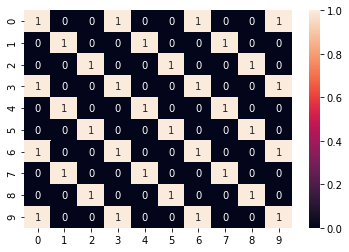

In [6]:
# Mencari kesamaan lagu dengan menggunakan genre

cosScore = cosine_similarity(df_matrix)

sns.heatmap(cosScore, annot=True)

In [7]:
# Menginput dengan nilai index
last_played = int(input('terakhir didengar? ')) 

# Membuat music_recom menggunakan cosScore dan juga input last_played
music_recom = list(enumerate(cosScore[last_played])) 

# music_recom yang telah diurutkan
your_recom = sorted(music_recom, key = lambda x: x[1], reverse = True)

# Showing 5 recommended music based on the input music
recom = []

for i in your_recom[1 : 5]:
    recom.append(df.iloc[i[0], 0])

print('Special Pick For You!')
for i in range(len(recom)):
    print('{}. {}'.format(1 + i, recom[i]))

terakhir didengar? 1
Special Pick For You!
1. Song_5
2. Song_8
3. Song_1
4. Song_3


## Anime Recommendation

In [8]:
anime = pd.read_csv('anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [10]:
anime = anime.iloc[ : , : 4]
anime.head()

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV


In [11]:
anime.isna().sum()

anime_id     0
name         0
genre       62
type        25
dtype: int64

In [12]:
anime = anime.dropna()
anime

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA
12290,5543,Under World,Hentai,OVA
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA


In [13]:
# text processing agar memisahkan nama genre yang tepat
cv = CountVectorizer(tokenizer = lambda x : x.split(', ')) 

by_genre = cv.fit_transform(anime['genre'])

In [14]:
print(len(cv.get_feature_names()))

print(cv.get_feature_names())

43
['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai', 'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts', 'mecha', 'military', 'music', 'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai', 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujo ai', 'shounen', 'shounen ai', 'slice of life', 'space', 'sports', 'super power', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri']


In [15]:
pd.DataFrame(by_genre.toarray())

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
coScore_anime = cosine_similarity(by_genre)

In [17]:
pd.DataFrame(coScore_anime)

,0,1,2,3,4,5,6,7,8,9,...,12200,12201,12202,12203,12204,12205,12206,12207,12208,12209
0,1.000000,0.188982,0.000000,0.000000,0.000000,0.447214,0.000000,0.250000,0.000000,0.000000,...,0.0,0.288675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.188982,1.000000,0.285714,0.000000,0.285714,0.338062,0.566947,0.377964,0.285714,0.285714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.267261,1.000000,0.267261,0.000000,0.000000,0.353553,0.267261,0.267261,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.577350,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.577350,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.577350,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.577350,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
anime = anime.reset_index()
anime

,index,anime_id,name,genre,type
0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...,...,...
12205,12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA
12206,12290,5543,Under World,Hentai,OVA
12207,12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA
12208,12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA


In [19]:
anime_liked = input('Apa anime yang anda sukai? ')

index_suka = anime[anime['name'] == anime_liked].index
index_suka[0]

anime_recom = list(enumerate(coScore_anime[index_suka[0]]))

your_recom = sorted(anime_recom, key = lambda x: x[1], reverse=True)

# Showing 5 recommended
recom = []
for i in your_recom[1 : 11]:
    recom.append(anime.iloc[i[0], 0])

print('Special Pick For You!')
for i in range(len(recom)):
    print('{}. {}, (Genre : {})'.format(1 + i, anime.iloc[recom[i], 2],anime.iloc[recom[i], 3] ))

Apa anime yang anda sukai? Steins;Gate
Special Pick For You!
1. Steins;Gate Movie: Fuka Ryouiki no Déjà vu, (Genre : Sci-Fi, Thriller)
2. Steins;Gate: Oukoubakko no Poriomania, (Genre : Sci-Fi, Thriller)
3. Steins;Gate: Kyoukaimenjou no Missing Link - Divide By Zero, (Genre : Sci-Fi, Thriller)
4. Angelique: Seichi yori Ai wo Komete, (Genre : Adventure, Comedy, Drama, Fantasy, Romance, Sci-Fi, Shoujo)
5. Majokko Tickle, (Genre : Comedy, Magic, Shoujo)
6. Aura Battler Dunbine OVA, (Genre : Adventure, Mecha, Sci-Fi)
7. Sakasama no Patema: Beginning of the Day, (Genre : Sci-Fi)
8. Mai-Otome 0: S.ifr, (Genre : Sci-Fi)
9. Ibara no Ou, (Genre : Action, Mystery, Sci-Fi, Thriller)
10. Happy☆Lesson: Advance, (Genre : Comedy, Harem, Romance, Slice of Life)
